In [1]:
import polars as pl
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from sf_quant.data import load_factors, get_factor_names #TODO:take out mom and rev
import datetime as dt

/home/boobus/projects/factor_momentum/.venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2025-11-10 07:49:05,777	INFO util.py:154 -- Missing packages: ['ipywidgets']. Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.


In [2]:
start = dt.date(2001,1,1); end = dt.date(2002,1,1)
factors_1y = load_factors(start, end, get_factor_names('style'))

In [ ]:
old_cols = [f'column_{i}' for i in range(len(factors_1y.columns)-1)]

scalar = StandardScaler()
X = (pl.DataFrame(
        scalar.fit_transform(factors_1y.drop('date'))
        )
    .rename({old: new for old, new in zip(old_cols, factors_1y.columns[1:])})
)
X

In [18]:
pca_model = PCA(n_components=len(factors_1y.columns)-1)
pca_model.fit(X)
pca_model.explained_variance_.round(3)

array([3.099, 2.125, 1.642, 1.269, 1.08 , 1.023, 0.968, 0.804, 0.758,
       0.641, 0.585, 0.543, 0.473, 0.441, 0.344, 0.27 ])

In [19]:
start = dt.date(2002,2,1); end = dt.date(2020,1,1)
factors = load_factors(start, end, get_factor_names('style'))

In [125]:
PCS = 11

## Transform & Signal

In [131]:
dates = factors.select(pl.col('date'))
pc_returns = pca_model.transform(factors.drop('date'))
pcs = pl.DataFrame(pc_returns)
pcs = dates.with_columns(pcs).rename({f'column_{i}': f'PC_{i}' for i in range(len(pcs.columns))})
pcs = pcs.select(pcs.columns[:PCS+1])
pcs

date,PC_0,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,PC_9,PC_10
date,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
2002-02-01,-0.000445,-0.154104,-0.227133,-0.048167,-0.124628,-0.093881,-0.099548,0.103969,0.072611,0.158709,0.281065
2002-02-04,-0.954136,0.113851,0.511483,-0.271661,-0.828323,0.046068,-0.183204,-0.051206,-0.166319,0.180647,0.157844
2002-02-05,-0.537577,0.184206,0.471581,-0.017592,-0.665587,0.09114,-0.37653,-0.11174,-0.105707,0.175968,0.154652
2002-02-06,-0.216192,0.265031,0.079159,0.06375,-0.215788,0.211771,-0.248585,-0.020127,0.045948,0.10846,0.094472
2002-02-07,0.156274,0.124577,-0.003645,-0.086394,0.403243,0.09109,0.167,-0.023536,0.117943,0.135156,-0.142222
…,…,…,…,…,…,…,…,…,…,…,…
2019-12-24,0.003972,-0.204916,-0.019263,0.037435,-0.013557,-0.040743,0.001697,-0.018585,-0.010403,0.033561,0.019581
2019-12-26,-0.028803,0.014958,0.103472,0.084363,0.044756,0.057346,0.108903,0.19781,-0.081128,0.023321,-0.0604
2019-12-27,-0.231587,0.154398,0.096124,-0.014337,-0.16357,0.051405,-0.04095,0.048003,-0.027896,-0.140417,0.071516


In [132]:
## to monthly 
columns = pcs.columns[1:]

pcs_monthly = (pcs.unpivot(
    index='date', variable_name='pc', value_name='ret'
)
.lazy()
.with_columns(
    pl.col('date').dt.truncate('1mo').alias('month')
)
.group_by(['pc', 'month']).agg(
        pl.col('date').first(),
        (np.log(1 + pl.col('ret')*.01).sum()).alias('ret')
)
.sort(['pc', 'month'])
.with_columns(
        pl.col('ret').shift(1).over('pc').alias('lag_ret')
)
)

In [133]:
from factor_momentum import construct_factor_signal_monthly

In [134]:
signals = construct_factor_signal_monthly(pcs_monthly, 'cross section')
signals

pc,month,date,ret,lag_ret,rank,count,signal
str,date,date,f64,f64,u32,u32,i32
"""PC_0""",2002-02-01,2002-02-01,-0.028004,null,null,0,0
"""PC_0""",2002-03-01,2002-03-01,0.015585,-0.028004,1,11,-1
"""PC_0""",2002-04-01,2002-04-01,-0.019128,0.015585,11,11,1
"""PC_0""",2002-05-01,2002-05-01,-0.021126,-0.019128,2,11,-1
"""PC_0""",2002-06-01,2002-06-03,-0.034665,-0.021126,1,11,-1
…,…,…,…,…,…,…,…
"""PC_9""",2019-08-01,2019-08-01,0.003303,0.001522,6,11,0
"""PC_9""",2019-09-01,2019-09-03,-0.006668,0.003303,6,11,0
"""PC_9""",2019-10-01,2019-10-01,0.000095,-0.006668,6,11,0


In [135]:
import matplotlib.pyplot as plt

ports = (signals.group_by(['signal', 'month']).agg(
    pl.col('ret').sum()
)
.pivot(on='signal', index='month', values='ret')
.sort(['month'])
)

dates = ports['month']
ports

month,0,1,-1
date,f64,f64,f64
2002-02-01,-0.023984,null,null
2002-03-01,-0.005836,-0.01323,0.027142
2002-04-01,0.009254,-0.037836,0.001364
2002-05-01,-0.000865,0.005287,-0.023859
2002-06-01,-0.009529,0.045037,-0.064751
…,…,…,…
2019-08-01,0.003303,-0.003447,-0.010305
2019-09-01,-0.006668,-0.041659,0.012043
2019-10-01,0.000095,0.007711,0.00292


## Plots

In [66]:
def plot():
    
    plt.title(f"Num PCs used: {PCS}")
    plt.plot(dates, ports['1'].cum_sum(), label='1')
    plt.plot(dates, ports['-1'].cum_sum(), label='-1')
    plt.plot(dates, (ports['1']-ports['-1']).cum_sum(), label='l/s')
    plt.legend()
    plt.grid(True)
    plt.show()

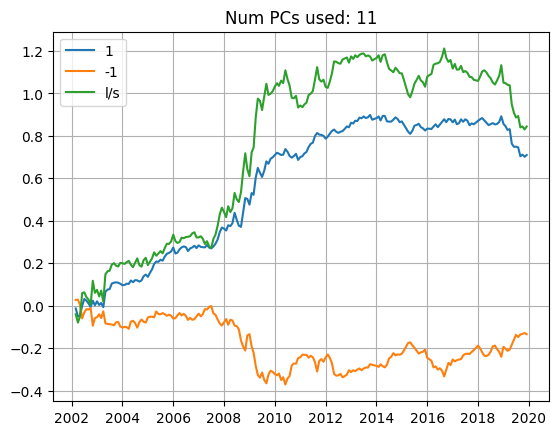

In [136]:
plot()

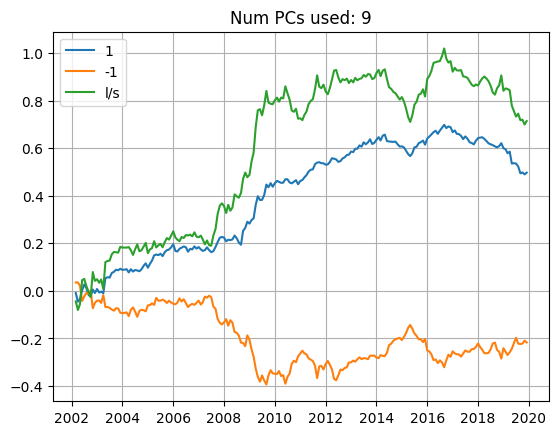

In [80]:
plot()

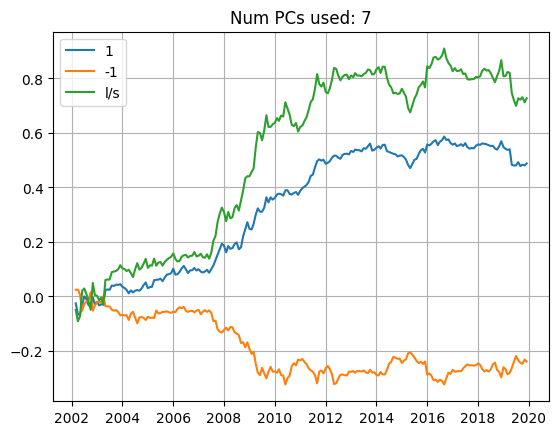

In [92]:
plot()

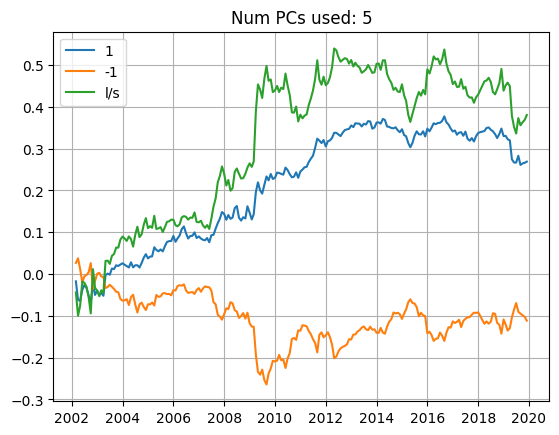

In [100]:
plot()

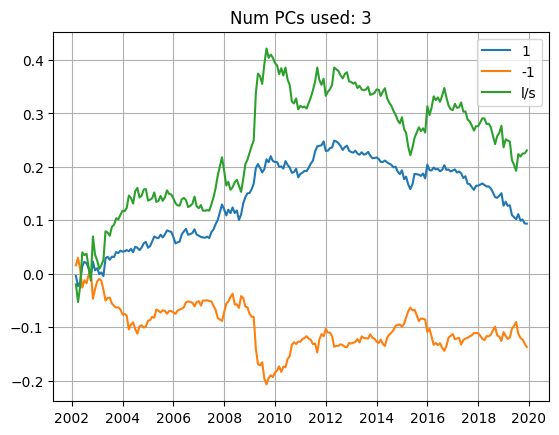

In [108]:
plot()

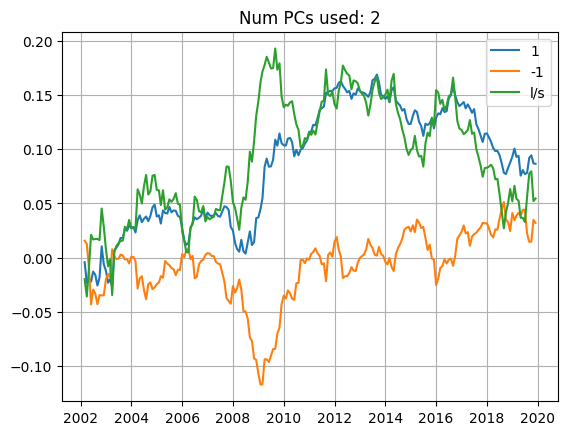

In [123]:
plot()